# Antenna toolkit example

This example demonstrates how to use the ``ToolkitBackend`` class.
It initiates AEDT through PyAEDT, sets up an empty HFSS design, and proceeds to create the antenna.

## Perform required imports

In [1]:
import tempfile

In [2]:
import pyaedt
from pyaedt.modules.solutions import FfdSolutionData

In [3]:
from ansys.aedt.toolkits.antenna.backend.api import ToolkitBackend
from ansys.aedt.toolkits.antenna.backend.models import properties

##  Set AEDT version

Set AEDT version.

In [4]:
aedt_version = "2024.1"

## Set non-graphical mode

Set non-graphical mode.

In [5]:
non_graphical = True

## Create temporary directory

In [6]:
temp_dir = tempfile.TemporaryDirectory(suffix="_ansys")
project_name = pyaedt.generate_unique_project_name(rootname=temp_dir.name, project_name="antenna_toolkit")

## Set default properties

In [7]:
properties.aedt_version = aedt_version
properties.non_graphical = non_graphical
properties.active_project = project_name

## Initialize toolkit

Initialize the toolkit.

In [8]:
toolkit_api = ToolkitBackend()

## Get available_antennas

In [9]:
print(toolkit_api.available_antennas)

['BowTieNormal', 'BowTieRounded', 'BowTieSlot', 'Archimedean', 'Log', 'Sinuous', 'AxialMode', 'Conical', 'Corrugated', 'EPlane', 'Elliptical', 'HPlane', 'Pyramidal', 'PyramidalRidged', 'QuadRidged', 'RectangularPatchEdge', 'RectangularPatchInset', 'RectangularPatchProbe']


## Get default properties

In [10]:
backend_properties = toolkit_api.get_properties()
frequency = backend_properties["antenna"]["synthesis"]["frequency"]
frequency_units = backend_properties["antenna"]["synthesis"]["frequency_unit"]
length_unit = backend_properties["antenna"]["synthesis"]["length_unit"]

## Modify default length units

In [11]:
properties.antenna.synthesis.length_unit = "cm"

## Create antenna object only for synthesis

Create antenna object.

In [12]:
antenna_parameters_1 = toolkit_api.get_antenna("RectangularPatchProbe", synth_only=True)

INFO - AEDT is released.


In [13]:
print(
    "Patch X length: {}{} at {}{}".format(
        str(antenna_parameters_1["patch_x"]),
        length_unit,
        frequency,
        frequency_units,
    )
)

Patch X length: 0.912871meter at 10.0GHz


## Change synthesis frequency

Modify resonance frequency and modify parameters with the ``set_properties()`` method.

In [14]:
new_frequency1 = 12.0
new_properties = {"frequency": new_frequency1}
toolkit_api.set_properties(new_properties)

INFO - Updating internal properties.


DEBUG - Updating 'frequency' with value 12.0


DEBUG - Properties were updated successfully.


(True, 'Properties were updated successfully.')

In [15]:
antenna_parameters_2 = toolkit_api.get_antenna("RectangularPatchProbe", synth_only=True)

INFO - AEDT is released.


In [16]:
print(
    "Patch X length: {}{} at {}{}".format(
        str(antenna_parameters_2["patch_x"]),
        length_unit,
        new_frequency1,
        frequency_units,
    )
)

Patch X length: 0.760726meter at 12.0GHz


## Change synthesis frequency

Modify resonance frequency with properties directly.

In [17]:
new_frequency2 = 15.0
properties.antenna.synthesis.frequency = new_frequency2

In [18]:
antenna_parameters_3 = toolkit_api.get_antenna("RectangularPatchProbe", synth_only=True)

INFO - AEDT is released.


In [19]:
print(
    "Patch X length: {}{} at {}{}".format(
        str(antenna_parameters_3["patch_x"]),
        length_unit,
        new_frequency2,
        frequency_units,
    )
)

Patch X length: 0.608581meter at 15.0GHz


## Initialize AEDT

Launch a new AEDT session in a thread.

In [20]:
thread_msg = toolkit_api.launch_thread(toolkit_api.launch_aedt)

DEBUG - Starting thread: Toolkit_Thread


DEBUG - Toolkit is not connected to AEDT.


DEBUG - Launching AEDT.


## Wait for the toolkit thread to be idle

Wait for the toolkit thread to be idle and ready to accept a new task.

In [21]:
idle = toolkit_api.wait_to_be_idle()
if not idle:
    print("AEDT not initialized.")
    sys.exit()

DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is busy and processing a task.


DEBUG - Toolkit is idle and ready to accept a new task.


## Connect to HFSS design

Create an HFSS design.

In [22]:
toolkit_api.connect_design("HFSS")

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit has been created.


PyAEDT INFO: Added design 'HFSS_U25KNM' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


PyAEDT INFO: Project antenna_toolkit Saved correctly


DEBUG - Project name: antenna_toolkit


INFO - Updating internal properties.


DEBUG - Updating 'project_list' with value ['C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt']


DEBUG - Updating 'active_design' with value HFSS_U25KNM


DEBUG - Updating 'active_project' with value C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt


DEBUG - Updating 'design_list' with value {'antenna_toolkit': ['HFSS_U25KNM']}


DEBUG - Properties were updated successfully.


INFO - Toolkit is connected to AEDT design.


True

## Create setup when antenna is created

Set ``create_setup`` property.

In [23]:
properties.antenna.setup.create_setup = True
properties.antenna.synthesis.outer_boundary = "Radiation"

## Create antenna in HFSS

Create antenna and set up in HFSS.

In [24]:
antenna_parameter = toolkit_api.get_antenna("RectangularPatchProbe")

PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.0156862735748291


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Open Region correctly created.


PyAEDT INFO: Project antenna_toolkit Saved correctly


PyAEDT WARNING: Argument `position` is deprecated for method `create_box`; use `origin` instead.


PyAEDT WARNING: Argument `dimensions_list` is deprecated for method `create_box`; use `sizes` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_box`; use `material` instead.


PyAEDT WARNING: Argument `csPlane` is deprecated for method `create_rectangle`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_rectangle`; use `origin` instead.


PyAEDT WARNING: Argument `dimension_list` is deprecated for method `create_rectangle`; use `sizes` instead.


PyAEDT WARNING: Argument `csPlane` is deprecated for method `create_rectangle`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_rectangle`; use `origin` instead.


PyAEDT WARNING: Argument `dimension_list` is deprecated for method `create_rectangle`; use `sizes` instead.


PyAEDT WARNING: Argument `cs_plane` is deprecated for method `create_circle`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_circle`; use `origin` instead.


PyAEDT WARNING: Argument `cs_axis` is deprecated for method `create_cylinder`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_cylinder`; use `origin` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_cylinder`; use `material` instead.


PyAEDT WARNING: Argument `cs_axis` is deprecated for method `create_cylinder`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_cylinder`; use `origin` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_cylinder`; use `material` instead.


PyAEDT WARNING: Argument `cs_axis` is deprecated for method `create_cylinder`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_cylinder`; use `origin` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_cylinder`; use `material` instead.


PyAEDT WARNING: Argument `cs_axis` is deprecated for method `create_cylinder`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_cylinder`; use `origin` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_cylinder`; use `material` instead.


PyAEDT WARNING: Argument `cs_plane` is deprecated for method `create_circle`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_circle`; use `origin` instead.


PyAEDT INFO: Boundary Perfect E PerfE_N0DRPR has been correctly created.


PyAEDT INFO: Boundary Perfect E PerfE_705TPT has been correctly created.


PyAEDT INFO: Boundary Perfect E PerfE_MEYNQX has been correctly created.


PyAEDT INFO: Boundary AutoIdentify port_Patch_Q1WNZ1_1 has been correctly created.


PyAEDT INFO: Project antenna_toolkit Saved correctly


PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


## Try. to create antenna

The AEDT Antenna Toolkit API does not allow the creation of more than one antenna. However, you can use the antenna
model's API to create more than one antenna.

In [25]:
new_antenna = toolkit_api.get_antenna("BowTie")

DEBUG - Antenna is already created.


In [26]:
print(new_antenna)

False


## Set properties

Move antenna X position

In [27]:
toolkit_api.update_hfss_parameters("pos_x", "20")

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit set to active.


PyAEDT INFO: Aedt Objects correctly read


INFO - Toolkit is connected to AEDT design.


PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


True

## Fit all

In [28]:
toolkit_api.connect_design()

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit set to active.


PyAEDT INFO: Aedt Objects correctly read


INFO - Toolkit is connected to AEDT design.


True

In [29]:
toolkit_api.aedtapp.modeler.fit_all()

PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.03130769729614258


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


In [30]:
toolkit_api.release_aedt(False, False)

PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


True

## Set properties

Move antenna X position to origin

In [31]:
toolkit_api.update_hfss_parameters("pos_x", "0")

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit set to active.


PyAEDT INFO: Aedt Objects correctly read


INFO - Toolkit is connected to AEDT design.


PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


True

## Analyze design in batch mode

In [32]:
toolkit_api.analyze()

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit set to active.


PyAEDT INFO: Aedt Objects correctly read


INFO - Toolkit is connected to AEDT design.


PyAEDT INFO: Project antenna_toolkit Saved correctly


PyAEDT WARNING: Argument `num_cores` is deprecated for method `analyze`; use `cores` instead.


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Solving all design setups.


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Design setup None solved correctly in 0.0h 1.0m 4.0s


PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


True

## Get scattering results

In [33]:
scattering_data = toolkit_api.scattering_results()

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit set to active.


PyAEDT INFO: Aedt Objects correctly read


INFO - Toolkit is connected to AEDT design.


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.031249284744262695


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


## Get farfield results

In [34]:
farfield_data = toolkit_api.farfield_results()

AttributeError: 'ToolkitBackend' object has no attribute 'farfield_results'

## Get farfield results

In [35]:
frequency_str = str(properties.antenna.synthesis.frequency) + properties.antenna.synthesis.frequency_unit
farfield_eep, farfield_frequency = toolkit_api.export_farfield(frequencies=frequency_str, sphere="3D", encode=False)

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit set to active.


PyAEDT INFO: Aedt Objects correctly read


INFO - Toolkit is connected to AEDT design.


PyAEDT INFO: Project antenna_toolkit Saved correctly


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.031250715255737305


PyAEDT INFO: Far field sphere 3D is assigned


PyAEDT INFO: Exporting embedded element patterns...


PyAEDT INFO: Exporting geometry...


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Exporting embedded element patterns.... Done: 1.704340934753418 seconds


PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


## Get antenna model

In [36]:
files = toolkit_api.export_aedt_model(encode=False)

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Returning found Desktop session with PID 5368!


PyAEDT INFO: Project antenna_toolkit set to active.


PyAEDT INFO: Aedt Objects correctly read


INFO - Toolkit is connected to AEDT design.


PyAEDT INFO: Project antenna_toolkit Saved correctly


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpcffdtx_0_ansys/pyaedt_prj_K1O/antenna_toolkit.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.04682111740112305


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT WARNING: Argument `obj_list` is deprecated for method `export_model_obj`; use `assignment` instead.


PyAEDT INFO: Desktop has been released.


INFO - AEDT is released.


## Release AEDT

Release AEDT.

In [37]:
toolkit_api.release_aedt(True, True)

DEBUG - Toolkit is not connected to AEDT.


DEBUG - Connecting AEDT.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is disabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: Connecting to AEDT session on gRPC port 58501


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


DEBUG - Toolkit is connected to AEDT.


PyAEDT INFO: Desktop has been released and closed.


INFO - AEDT is released.


True

## Plot results

Plot exported files

In [38]:
from pyaedt.generic.plot import ModelPlotter

In [39]:
model = ModelPlotter()
for file in files:
    model.add_object(file[0], file[1], file[2])

C:\Users\Public\actions-runner\_work\pyaedt-toolkits-antenna\pyaedt-toolkits-antenna\.venv\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


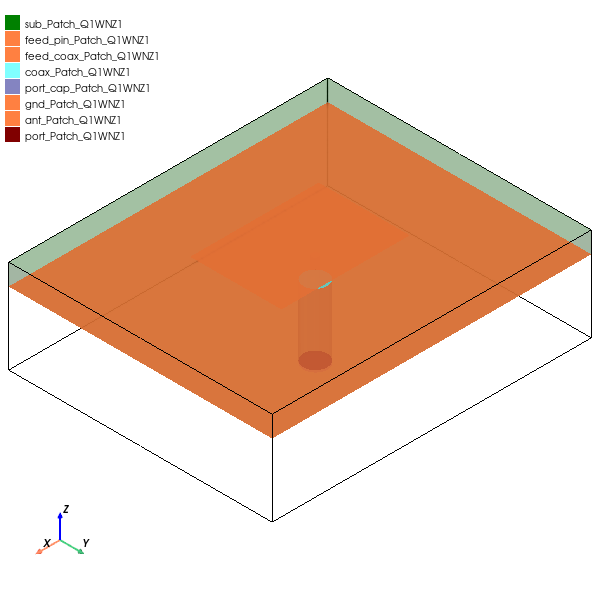

True

In [40]:
model.plot()

## Load far field

In [41]:
farfield_data = FfdSolutionData(farfield_eep[0], farfield_frequency)

## Plot far field

C:\Users\Public\actions-runner\_work\pyaedt-toolkits-antenna\pyaedt-toolkits-antenna\.venv\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


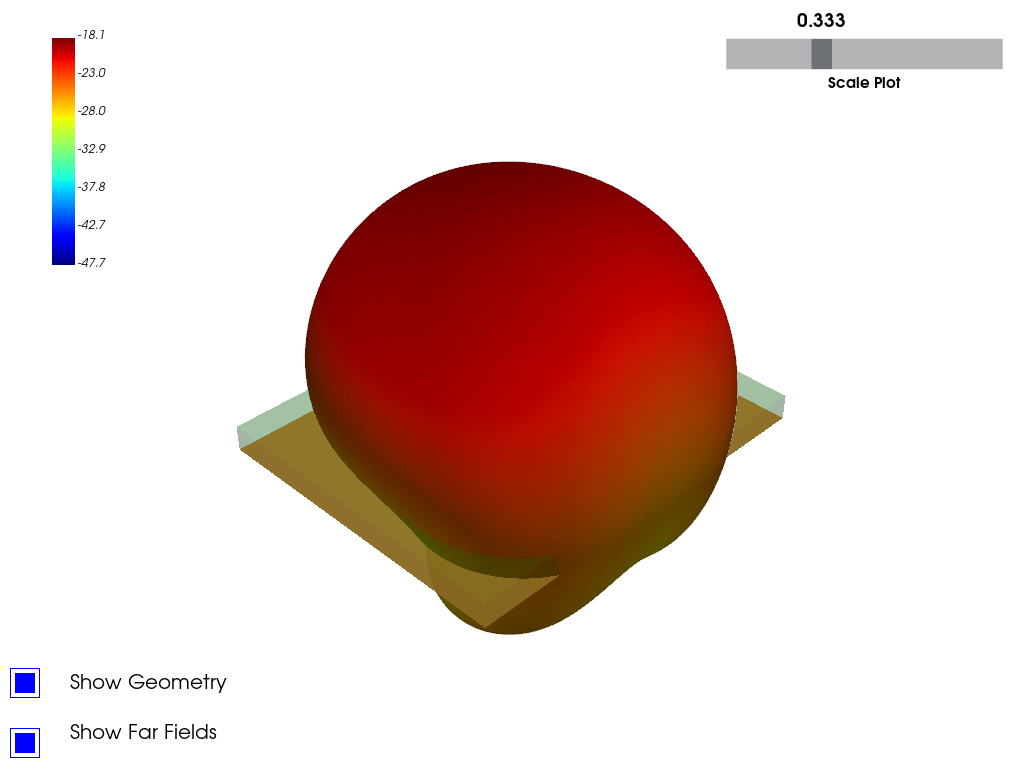

In [42]:
data = farfield_data.polar_plot_3d_pyvista()

## Clean temporary directory

In [43]:
temp_dir.cleanup()